# Support Vector Machine

In deze opdracht ga je Support Vector classificatie toepassen om de afbeeldingen uit de digits dataset te herkennen. Door middel van een cross validated grid search moeten de juiste parameters voor de SVM gezocht worden.

In [2]:
# misc data processing imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# dataset
from sklearn.datasets import load_digits

# classifier & testing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

## 1. Data laden

* Laad de digits dataset die ook tijdens het Nearest Centroid practicum gebruikt is.
* Schaal de features tussen 0 en 1.
* Verdeel de data in een train set (80%) en test set (20%).

In [3]:
data = load_digits()
X = data.data
y = data.target

In [4]:
X = X / np.max(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. SVM trainen

  * Voer een 5-fold cross validated grid search met een Support Vector Classifier uit,  
  om de optimale waarden te vinden voor de `kernel` ('linear' of 'rbf') en de penalty parameter `C`.  
  Zie: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [6]:
C_param_values = [0.01, 0.03, 0.1, 0.3, 1, 3]
kernel_param_values = ['linear','rbf']
parameters = {'C':C_param_values, 'kernel':kernel_param_values}
clfMulPar = GridSearchCV(SVC(),parameters, cv=5).fit(X_train, y_train)

  * Plot de gemiddelde test scores per parameter setting in een heatmap. Zet hierbij het kernel type op de x-as en de instelling voor `C` op de y-as.  
Zie: https://seaborn.github.io/generated/seaborn.heatmap.html#seaborn.heatmap

In [7]:
dataHM = clfMulPar.cv_results_['mean_test_score'] #np array 1 dimension, moet naar 2 dimensie voor heatmap
dataHM

array([ 0.93528184,  0.12595685,  0.96659708,  0.12595685,  0.97842728,
        0.74321503,  0.98329854,  0.93041058,  0.98051496,  0.96798887,
        0.97981907,  0.98329854])

In [10]:
shape=(len(C_param_values),len(kernel_param_values)) #definitie van de nieuwe shape voor de data, namelijk
                                                    #het aantal kernels x het aantal C
dataHMr = dataHM.reshape(shape) #reshape de data volgens de nieuwe shape
    
dataHMr

array([[ 0.93528184,  0.12595685],
       [ 0.96659708,  0.12595685],
       [ 0.97842728,  0.74321503],
       [ 0.98329854,  0.93041058],
       [ 0.98051496,  0.96798887],
       [ 0.97981907,  0.98329854]])

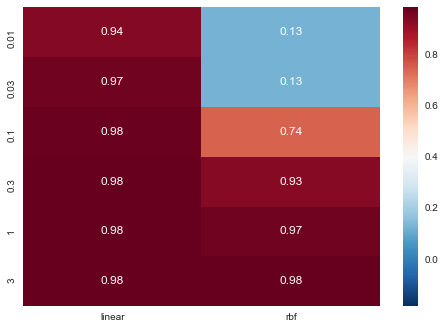

In [12]:
sns.heatmap(dataHMr, center=0.4, yticklabels=C_param_values, xticklabels=kernel_param_values, annot=True)

  * Print de beste parameter settings en de bijbehorende score.

In [13]:
clfMulPar.best_params_

{'C': 0.3, 'kernel': 'linear'}

## 3. SVM testen

  * Classificeer de test data aan de hand van de best scorende SVM-parameter settings.

In [14]:
y_pred = clfMulPar.predict(X_test)

* Bereken per digit de error tussen de voorspelde waarden en de targets door middel van (1 - F1 score)

In [15]:
errors = 1 - f1_score(y_test, y_pred, average=None)
errors

array([ 0.        ,  0.04109589,  0.        ,  0.        ,  0.02380952,
        0.02272727,  0.01639344,  0.01204819,  0.08823529,  0.01538462])

  * Plot de errors per target in een histogram plot.
  * Vergelijk het historgram met de scores van de nearest-centroid methode.

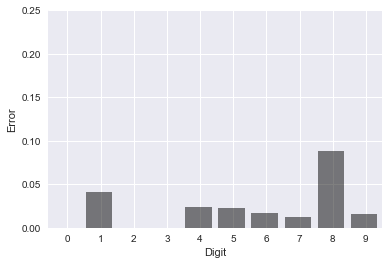

In [16]:
plt.figure(figsize=(6,4))

# plot f1 scores as bars
positions = np.arange(10)-0.45
plt.bar(positions, errors, color='k', alpha=0.5)

# limit range of axes
axes = plt.gca()
axes.set_xlim([-0.6, 9.5])
axes.set_ylim([0, 0.25])

# label each digit on x-axis
plt.xticks(np.arange(0, 10, 1.0))

# set axes labels
plt.xlabel('Digit')
plt.ylabel('Error')

# show plot
plt.show()